In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

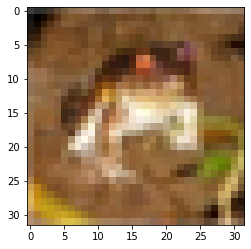

In [6]:
plt.imshow(x_train[0])

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255
x_test = x_test/255

In [9]:
x_test.shape

(10000, 32, 32, 3)

In [10]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [11]:
y_train[0]

array([6], dtype=uint8)

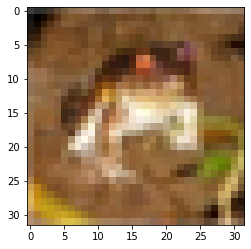

In [12]:
plt.imshow(x_train[0])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [14]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [16]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [17]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5035 - accuracy: 0.4573 - val_loss: 1.2880 - val_accuracy: 0.5432
Epoch 2/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1865 - accuracy: 0.5827 - val_loss: 1.1391 - val_accuracy: 0.5977
Epoch 3/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0436 - accuracy: 0.6350 - val_loss: 1.0581 - val_accuracy: 0.6302
Epoch 4/15
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9406 - accuracy: 0.6710 - val_loss: 0.9966 - val_accuracy: 0.6568
Epoch 5/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8521 - accuracy: 0.7026 - val_loss: 0.9761 - val_accuracy: 0.6643
Epoch 6/15
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7761 - accuracy: 0.7281 - val_loss: 0.9719 - val_accuracy: 0.6737
Epoch 7/15
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7101 - accuracy: 0.7522 - val_loss: 1.0549 -

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.503546,0.45728,1.287971,0.5432
1,1.186465,0.58272,1.139109,0.5977
2,1.043575,0.63498,1.058065,0.6302
3,0.940551,0.67096,0.996575,0.6568
4,0.852069,0.70264,0.976099,0.6643
5,0.776073,0.72810,0.971915,0.6737
6,0.710107,0.75216,1.054937,0.6549
7,0.643902,0.77508,0.986071,0.6797


In [21]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

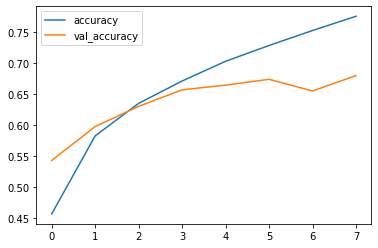

In [22]:
metrics[['accuracy', 'val_accuracy']].plot()

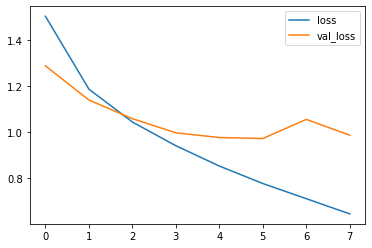

In [23]:
metrics[['loss', 'val_loss']].plot()

In [24]:
model.evaluate(x_test,y_cat_test, verbose=0)

[0.9860712885856628, 0.6797000169754028]

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1000
           1       0.80      0.81      0.81      1000
           2       0.58      0.60      0.59      1000
           3       0.42      0.64      0.51      1000
           4       0.71      0.58      0.64      1000
           5       0.60      0.47      0.53      1000
           6       0.79      0.76      0.77      1000
           7       0.71      0.72      0.71      1000
           8       0.76      0.81      0.78      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [28]:
confusion_matrix(y_test, predictions)

array([[664,  21,  69,  45,  14,   9,  10,  13, 112,  43],
       [ 14, 814,  10,  16,   2,   4,  13,   5,  41,  81],
       [ 40,  10, 605, 137,  57,  51,  43,  35,  17,   5],
       [ 14,   6,  72, 637,  43, 114,  43,  44,  16,  11],
       [ 17,   2,  80, 120, 579,  50,  42,  92,  16,   2],
       [  9,   4,  68, 305,  30, 473,  30,  68,   6,   7],
       [  7,   9,  65,  90,  33,  19, 764,   6,   3,   4],
       [ 11,   5,  36,  89,  51,  57,  10, 718,   4,  19],
       [ 46,  45,  22,  27,   2,   7,   6,  10, 807,  28],
       [ 25, 101,  14,  40,   4,   9,  11,  24,  36, 736]])

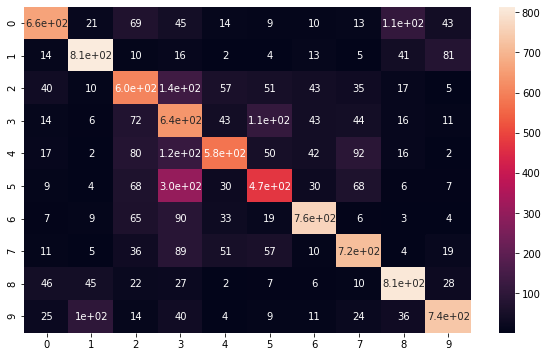

In [29]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot =True)

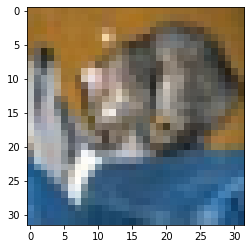

In [30]:
my_image = x_test[0]
plt.imshow(my_image)

In [31]:
y_test[0]

array([3], dtype=uint8)

In [32]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([3])